In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("mail_data.csv")

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

## DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#renaming the columns
df.rename(columns={"Category":"Target","Message":"Mails"},inplace=True)

In [ ]:
df.head()

,Target,Mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#label encoding the target column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Target"]=encoder.fit_transform(df["Target"])

In [ ]:
df.head()

,Target,Mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#check for missing values
df.isnull().sum()

Target    0
Mails     0
dtype: int64

In [ ]:
#check for duplicate values
df.duplicated().sum()

415

In [ ]:
#removing duplicate values
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5157, 2)

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

,Target,Mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["Target"].value_counts()

0    4516
1     641
Name: Target, dtype: int64

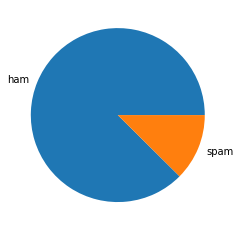

In [ ]:
plt.pie(df["Target"].value_counts(),labels=["ham","spam"])
plt.show()

0    4516
1     641
Name: Target, dtype: int64

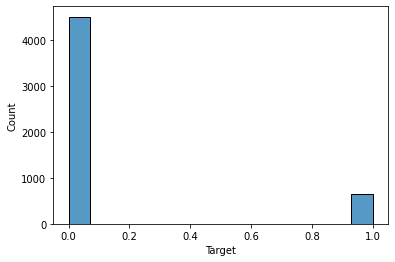

In [ ]:
sns.histplot(df["Target"])
df["Target"].value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


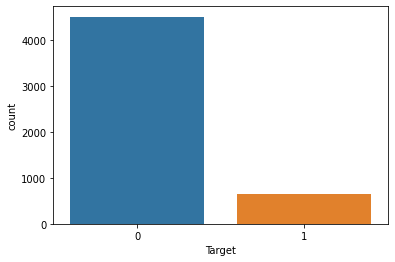

In [ ]:
sns.countplot(df["Target"])

In [ ]:
#DATA IS IMBALANCED


# DATA PREPROCESSING

In [ ]:
#splitting the data as X and Y
X=df["Mails"]
Y=df["Target"]


In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Mails, Length: 5157, dtype: object


In [ ]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5157, dtype: int64


In [ ]:
#splitting the data into training and test sample
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
print(X.shape)
print(x_train.shape)
print(x_test.shape)

(5157,)
(4125,)
(1032,)


# TF-IDF

The purpose of tf-idf is highlight words which are frequent in a document but not across all documents

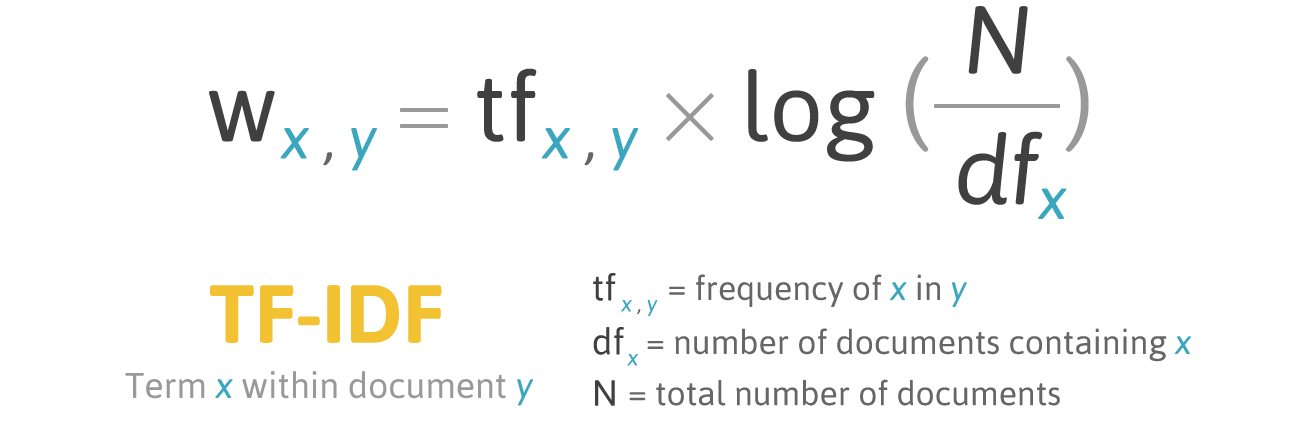

In [ ]:
#transforming the test data into feature vectors so that it can be used for model traing
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)
X_train = tfidf.fit_transform(x_train)   
X_test = tfidf.transform(x_test)

In [ ]:
tfidf.vocabulary_

{'dun': 2400,
 'believe': 1247,
 'thk': 6605,
 'told': 6692,
 'teach': 6492,
 'ship': 5859,
 'cars': 1592,
 'send': 5786,
 'logo': 4038,
 'ur': 6925,
 'lover': 4089,
 'names': 4522,
 'joined': 3695,
 'heart': 3252,
 'txt': 6828,
 'love': 4084,
 'name1': 4519,
 'name2': 4520,
 'mobno': 4393,
 'adam': 798,
 'eve': 2564,
 '07123456789': 25,
 '87077': 682,
 'yahoo': 7355,
 'pobox36504w45wq': 5064,
 'txtno': 6835,
 'ads': 820,
 '150p': 300,
 'sir': 5948,
 'need': 4560,
 'velusamy': 6989,
 'date': 2094,
 'birth': 1293,
 'company': 1839,
 'bank': 1166,
 'facilities': 2644,
 'details': 2186,
 'emailed': 2480,
 'yifeng': 7383,
 'oredi': 4796,
 'fr': 2854,
 'thank': 6561,
 'meet': 4271,
 'monday': 4412,
 'gonna': 3061,
 'finish': 2752,
 'bath': 1194,
 'good': 3063,
 'fine': 2749,
 'night': 4609,
 'doing': 2310,
 'langport': 3872,
 'sorry': 6086,
 'll': 4018,
 'probably': 5220,
 'bed': 1228,
 '9pm': 729,
 'sucks': 6335,
 'ill': 3468,
 'xmas': 7340,
 'go2sri': 3042,
 'lanka': 3874,
 'hello': 3268,

In [ ]:
print(X_train)

  (0, 6692)	0.48303813512243965
  (0, 6605)	0.4898673616987752
  (0, 1247)	0.5538832733861689
  (0, 2400)	0.4689535663823655
  (1, 1592)	0.5594126567616489
  (1, 5859)	0.5964494866231046
  (1, 6492)	0.5755914257195885
  (2, 300)	0.16113294658934302
  (2, 820)	0.24488128414489752
  (2, 6835)	0.24488128414489752
  (2, 5064)	0.22967525805125708
  (2, 7355)	0.21568440262445418
  (2, 682)	0.22967525805125708
  (2, 25)	0.24488128414489752
  (2, 2564)	0.19505111090227498
  (2, 798)	0.24488128414489752
  (2, 4393)	0.24488128414489752
  (2, 4520)	0.24488128414489752
  (2, 4519)	0.24488128414489752
  (2, 4084)	0.2644704778405301
  (2, 6828)	0.13848562282513652
  (2, 3252)	0.18176623831152225
  (2, 3695)	0.21568440262445418
  (2, 4522)	0.2363176943466334
  (2, 4089)	0.2196593047164816
  :	:
  (4120, 1223)	0.5846719438819551
  (4120, 6456)	0.4751891362657192
  (4120, 3181)	0.4285103741434733
  (4120, 3921)	0.39220487670240334
  (4120, 2101)	0.30807173962343376
  (4121, 5968)	0.4786671802830861
  (

# MODEL BUILDING AND TRAINING 

In [ ]:
from sklearn.linear_model import LogisticRegression
#fitting the data to the model
#logistic regression
lr=LogisticRegression()
lr.fit(X_train,y_train)

#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)

#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,criterion="entropy")
rfc.fit(X_train,y_train)

#support vector machine
from sklearn.svm import SVC
supp=SVC(kernel="linear")
supp.fit(X_train,y_train)




SVC(kernel='linear')

# EVALUATION OF MODEL

## #Logitic regression

In [ ]:

#prediction of training data
y_predict=lr.predict(X_train)

#pedicted values
print(y_predict)
from sklearn.metrics import accuracy_score
acctr=accuracy_score(y_train,y_predict)
print("Accuracy on training data is:",acctr)


[0 0 0 ... 0 0 0]
Accuracy on training data is: 0.961939393939394


In [ ]:
#prediction on testing data
Y_pred=lr.predict(X_test)

#predicted values of test data
print(Y_pred)
accte=accuracy_score(y_test,Y_pred)
print("Accuracy on testing data is:",accte)

[0 0 0 ... 0 0 0]
Accuracy on testing data is: 0.9544573643410853


Accuracy is : 0.9544573643410853
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       893
           1       1.00      0.66      0.80       139

    accuracy                           0.95      1032
   macro avg       0.97      0.83      0.89      1032
weighted avg       0.96      0.95      0.95      1032



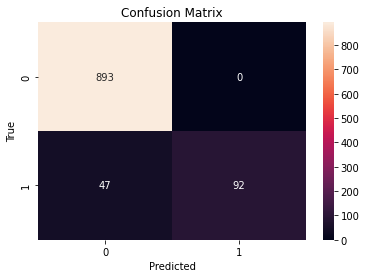

In [ ]:
#confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy is :",accte)
matrix = confusion_matrix(y_test, Y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, Y_pred))

## #Decision tree classifier

In [ ]:
#prediction on train data
y_predict1=dtc.predict(X_train)


#predicted values of train dataset
print(y_predict1)
Acct=accuracy_score(y_train,y_predict1)
print("Accuracy on training data is:",Acct)

[0 0 1 ... 0 0 0]
Accuracy on training data is: 1.0


In [ ]:
#prediction of test data
Y_pred1=dtc.predict(X_test)
print(Y_pred1)
acc=accuracy_score(y_test,Y_pred1)
print("Accuracy of test data is",acc)


[0 0 0 ... 0 0 0]
Accuracy of test data is 0.9534883720930233


Acuuracy is  0.9534883720930233
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       893
           1       0.88      0.76      0.81       139

    accuracy                           0.95      1032
   macro avg       0.92      0.87      0.89      1032
weighted avg       0.95      0.95      0.95      1032



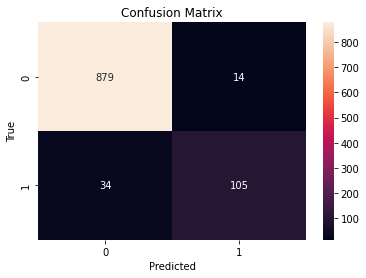

In [ ]:
#confusion matrix and classification report
matrix1 = confusion_matrix(y_test, Y_pred1)
acc=accuracy_score(y_test,Y_pred1)
print("Acuuracy is ",acc)
sns.heatmap(matrix1, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, Y_pred1))

## #Random forest classifier

In [ ]:
#prediction of train data
y_predictrfc=rfc.predict(X_train)
print(y_predictrfc)
accrfc=accuracy_score(y_train,y_predictrfc)
print("Accuracy score of train data is:",accrfc)

[0 0 1 ... 0 0 0]
Accuracy score of train data is: 1.0


In [ ]:

#prediction of test data
Y_pred2=rfc.predict(X_test)
print(Y_pred2)
acc1=accuracy_score(y_test,Y_pred2)
print("Accuracy score of test data is:",acc1)


[0 0 0 ... 0 0 0]
Accuracy score of test data is: 0.9728682170542635


Acuuracy is  0.9728682170542635
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       893
           1       0.99      0.81      0.89       139

    accuracy                           0.97      1032
   macro avg       0.98      0.90      0.94      1032
weighted avg       0.97      0.97      0.97      1032



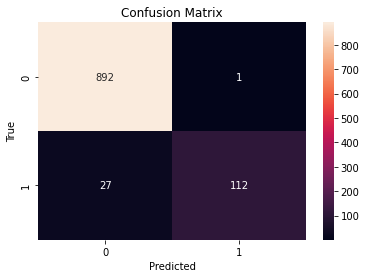

In [ ]:
#confusion matrix and classification report
matrix2 = confusion_matrix(y_test, Y_pred2)
acc1=accuracy_score(y_test,Y_pred2)
print("Acuuracy is ",acc1)
sns.heatmap(matrix2, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, Y_pred2))

## #Supportcector machine

In [ ]:
#prediction of train data
y_predictsvm=supp.predict(X_train)
print(y_predictsvm)
accsvm=accuracy_score(y_train,y_predictsvm)
print("Accuracy score of train data is:",accsvm)

[0 0 1 ... 0 0 0]
Accuracy score of train data is: 0.9966060606060606


In [ ]:

#prediction of test data
Y_pred3=supp.predict(X_test)
print(Y_pred3)
acc2=accuracy_score(y_test,Y_pred3)
print("Accuracy score of test data is:",acc2)

[0 0 0 ... 0 0 0]
Accuracy score of test data is: 0.9835271317829457


Acuuracy is  0.9835271317829457
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       893
           1       1.00      0.88      0.93       139

    accuracy                           0.98      1032
   macro avg       0.99      0.94      0.96      1032
weighted avg       0.98      0.98      0.98      1032



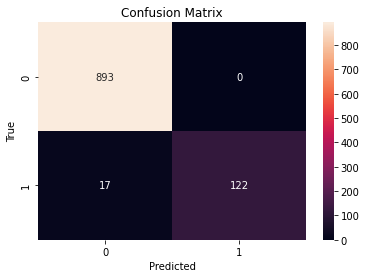

In [ ]:
#confusion matrix and classification report
matrix3 = confusion_matrix(y_test, Y_pred3)
acc2=accuracy_score(y_test,Y_pred3)
print("Acuuracy is ",acc2)
sns.heatmap(matrix3, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, Y_pred3))

# BUILDING A PREDICTIVE SYSTEM

In [ ]:
input_mail=["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

#covert the text to vectors
input_data=tfidf.transform(input_mail)

#making prediction
Prediction=supp.predict(input_data)
print(Prediction)

if(Prediction==0):
  print("It is ham mail")

else:
  print("It is spam mail")


[0]
It is ham mail
